# Análisis de datos para Z4(12)

In [2]:
# Librerías
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import interpolate
import glob
import math
import csv
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
mpl.rcParams.update(mpl.rcParamsDefault)

### Tomando datos de XENON1T para detección directa

Necesitamos los limites de detección directa provenientes de XENON1T para descartar puntos en el espacio de parámetros. Para esto utilizamos datos (No oficiales) encontrados en el repositorio de github https://github.com/bradkav/Xenon1T-2018 de manera provisional por ahora. Podemos graficar para comparar con lo esperado por los resultados de XENON1T y el artículo de Zapata y Yaguna.

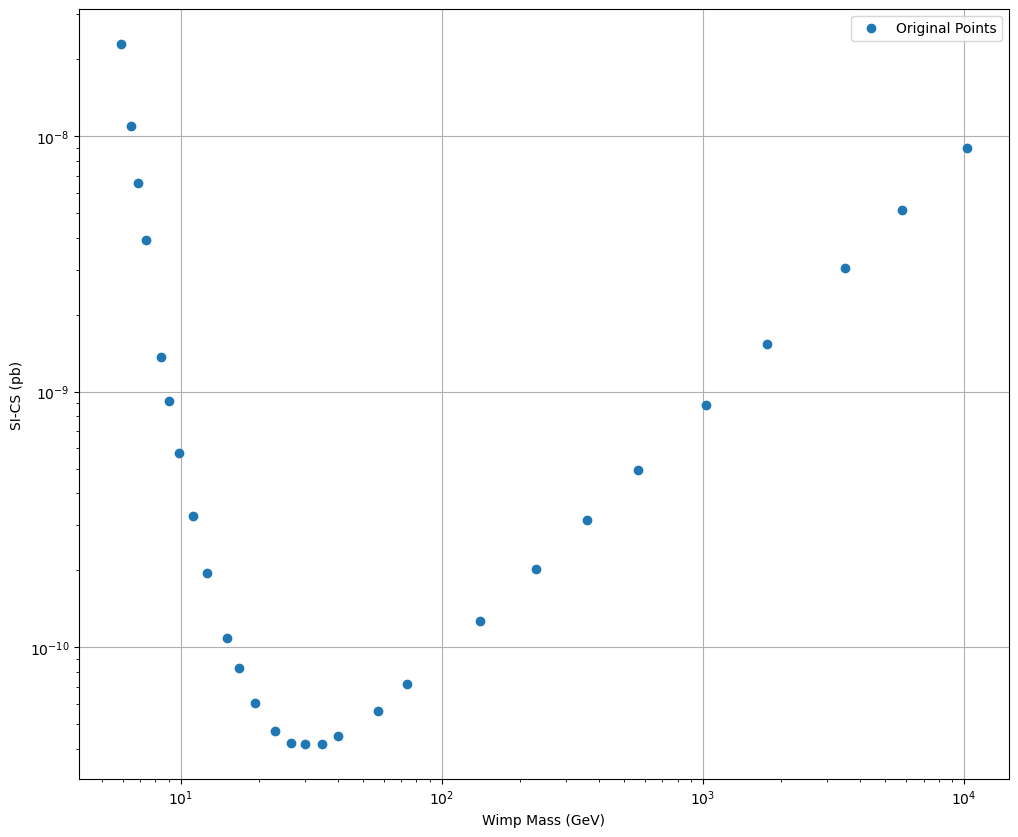

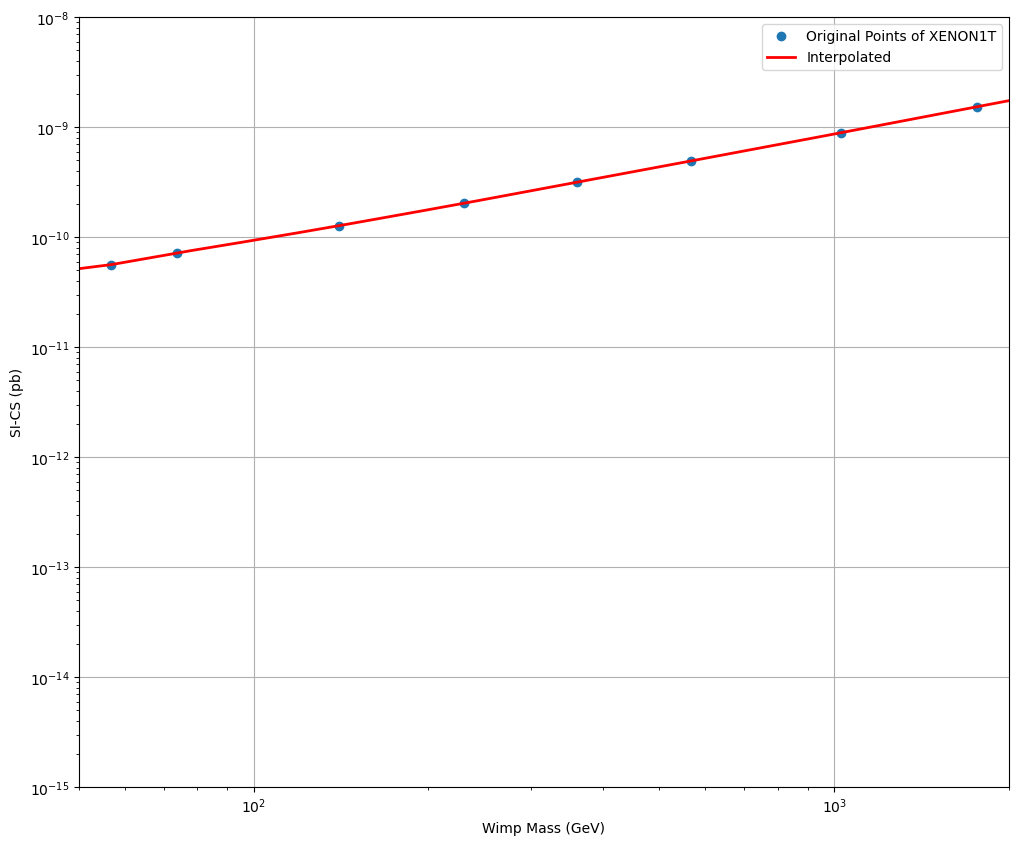

In [3]:
# Funcion para leer columnas del txt que contiene los datos del XENON1T
def read_text_file_to_arrays(filename):
    # Abrir el archivo y leyendo linea
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    # Arreglos para guardar los datos
    col1_data = []
    col2_data = []
    
    # Iterando sobre las lineas, spliting por el espacio en blanco y añadiendo a las listas
    for line in lines:
        data = line.split()  # Asumiendo que se separan por un espacio en blanco
        if len(data) >= 2:  # Revisando que hay dos columnas por linea
            # Convirtiendo lineas a floats
            col1_data.append(float(data[0])) 
            col2_data.append(float(data[1])) 
    
    # Convirtiendo a arrays de numpy
    col1_array = np.array(col1_data)
    col2_array = np.array(col2_data)
    
    return col1_array, col2_array

# Leyendo datos de XENON1T

filename = 'Xenon1T-2018-limit.txt'

col1_array, col2_array = read_text_file_to_arrays('Xenon1T-2018-limit.txt')

sigmasidatacm2 = col2_array

sigmasidatapb = col2_array*1e36

# Graficando los datos originales
plt.figure(figsize=(12, 10))
plt.plot(col1_array, sigmasidatapb, 'o', label='Original Points')
plt.ylabel('SI-CS (pb)')
plt.xlabel('Wimp Mass (GeV)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Generando una interpolación utilizando los datos en las zonas de masa de interés

f = interpolate.interp1d(col1_array, sigmasidatapb)

massnew = np.logspace(np.log10(40), np.log10(2000), 10000, base=10)

sigmasinew = f(massnew)

# Visualize both the original data points and the interpolated curve
plt.figure(figsize=(12, 10))
plt.plot(col1_array, sigmasidatapb, 'o', label='Original Points of XENON1T')
plt.plot(massnew, sigmasinew, '-', color='red', linewidth=2, label='Interpolated')
plt.ylabel('SI-CS (pb)')
plt.xlabel('Wimp Mass (GeV)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e1,2e3)
plt.ylim(1e-15,1e-8)
plt.legend()
plt.grid(True)
plt.show()

Ahora busco comparar con los puntos que tomé a mano de lo gráfica del artículo de Zapata y Yaguna para comprobar que obetenemos lo esperado

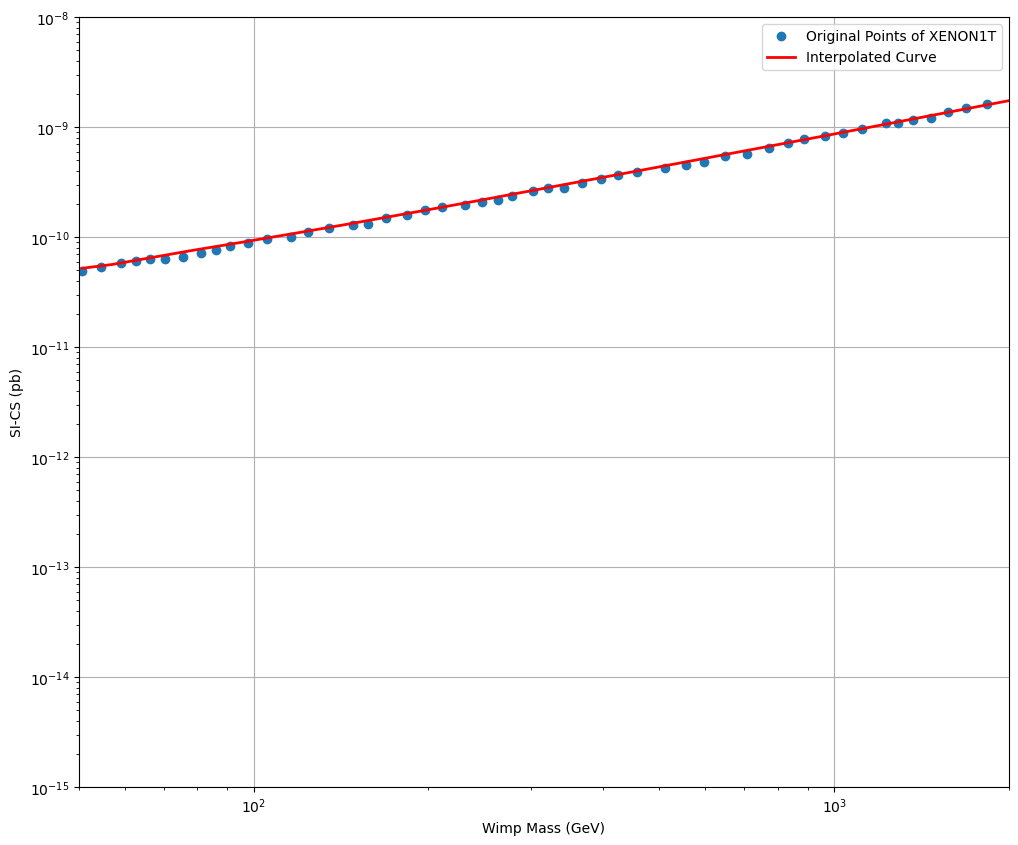

In [4]:
# Función para extraer datos de un csv
def load_csv(filename):
    data = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  
        for row in csv_reader:
            data.append([float(val) for val in row])
    return data

# Cargando los puntos desde un csv
filename = 'points_by_hand.csv'
data = load_csv(filename)

# Guardando puntos 
x = [point[0] for point in data]
y = [point[1] for point in data]

# Generando arreglos basados en la interpolación

xnew = np.logspace(np.log10(x[0]), np.log10(2000), 10000, base=10)

ynew = f(xnew)

# Visualize both the original data points and the interpolated curve
plt.figure(figsize=(12, 10))
plt.plot(x, y, 'o', label='Original Points of XENON1T')
plt.plot(xnew, ynew, '-', color='red', linewidth=2, label='Interpolated Curve')
plt.ylabel('SI-CS (pb)')
plt.xlabel('Wimp Mass (GeV)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e1,2e3)
plt.ylim(1e-15,1e-8)
plt.legend()
plt.grid(True)
plt.show()

La conclusión es que los datos encontrados generan una interpolación razonable comparada con lo esperado para el artículo de Zapata y Yaguna

### Lectura de datos de densidad de reliquia provenientes de micrOmegas

Buscamos acumular todos los puntos almacenados en diferentes archivos csv guardados en algún directorio.

In [5]:
# Nombre del directorio que contiene los datos a analizar
csv_dir = 'data_run1'

# Usando glob para encontrar todos los csv del directorio
csv_files = glob.glob(f'{csv_dir}/*.csv')

# Arreglo para almacenar todo
all_arrays1 = np.array([])

# Contador para cambiar el comportamiento de la primera iteración

i = 0

# Ciclo para cada archivo csv
for file_path in csv_files:
    with open(file_path, mode='r') as file:
        # Creando objeto de csv reader
        csv_reader = csv.reader(file)
        
        # Convirtiendo en arreglo de numpy
        data = np.loadtxt(file_path, delimiter=',')

        # El primero lo asigna
        if i==0:
            all_arrays1 = data
        
        # El resto se concatenan
        else:
            all_arrays1 = np.concatenate([all_arrays1, data],axis=0)
    i+=1

all_arrays = all_arrays1

In [ ]:
# Nombre del directorio que contiene los datos a analizar
csv_dir = 'data_run2'

# Usando glob para encontrar todos los csv del directorio
csv_files = glob.glob(f'{csv_dir}/*.csv')

# Arreglo para almacenar todo
all_arrays2 = np.array([])

# Contador para cambiar el comportamiento de la primera iteración

i = 0

# Ciclo para cada archivo csv
for file_path in csv_files:
    with open(file_path, mode='r') as file:
        # Creando objeto de csv reader
        csv_reader = csv.reader(file)
        
        # Convirtiendo en arreglo de numpy
        data = np.loadtxt(file_path, delimiter=',')

        # El primero lo asigna
        if i==0:
            all_arrays2 = all_arrays1
        
        # El resto se concatenan
        else:
            all_arrays2 = np.concatenate([all_arrays2, data],axis=0)
    i+=1

all_arrays = all_arrays2

In [ ]:
# Nombre del directorio que contiene los datos a analizar
csv_dir = 'data_run3'

# Usando glob para encontrar todos los csv del directorio
csv_files = glob.glob(f'{csv_dir}/*.csv')

# Arreglo para almacenar todo
all_arrays3 = np.array([])

# Contador para cambiar el comportamiento de la primera iteración

i = 0

# Ciclo para cada archivo csv
for file_path in csv_files:
    with open(file_path, mode='r') as file:
        # Creando objeto de csv reader
        csv_reader = csv.reader(file)
        
        # Convirtiendo en arreglo de numpy
        data = np.loadtxt(file_path, delimiter=',')

        # El primero lo asigna
        if i==0:
            all_arrays3 = all_arrays2
        
        # El resto se concatenan
        else:
            all_arrays3 = np.concatenate([all_arrays3, data],axis=0)
    i+=1

all_arrays = all_arrays3

Una vez procesado nos interesa ver la forma del arreglo final:

In [ ]:
print(all_arrays.shape)

(3025308, 12)


### Filtros para resultados de densidad de reliquia

No todos los puntos generados aleatoreamente generan densidades de reliquia que nos interesan. Por esto buscamos filtrar los puntos que por algún motivo no son válidos o no son de interés.

In [ ]:
# Asignando el arreglo de data

#data = np.loadtxt('output_Z4.csv', delimiter=',')

data = all_arrays

# Extraer parametros para probar acoples no imaginarios

mass_1 = data[:, 0]

mass_2 = data[:, 2]

ls1 = data[:, 5]

ls2 = data[:, 6]

# Extraer la columna de densidad de reliquia total
#omega_column = data[:, -2] + data[:, -3]

omega_column = data[:, -1]

# Condiciones sencillas

# Densidad de reliquia correcta (Entre 0.11 y 0.13)

cond1 = (0.11 < omega_column)

cond2 = (omega_column < 0.13)

# Acoples no imaginarios

cond3 = ((mass_1**2 - 1/2 * ls1 * 246**2) > 0)

cond4 = ((mass_2**2 - 1/2 * ls2 * 246**2) > 0)

# Jerarquía de masa

cond5 = (mass_2 < mass_1)

# Condiciones complicadas

# Deteccion indirecta

Mh = 126

vev = 246

Gamma1 = (mass_1<(Mh/2)) * 2 * ls1**2 * vev**2 /(32*np.pi*Mh) * np.sqrt(1 - 4*mass_1**2/Mh**2 + 0j)

Gamma2 = (mass_2<(Mh/2)) * ls2**2 * vev**2 /(32*np.pi*Mh) * np.sqrt(1 - 4*mass_2**2/Mh**2 + 0j)

cond6 = ((Gamma1 + Gamma2)/3.2e-3 <= 0.13) # Podria ser 4.2

# Deteccion directa

mp = 0.938

fp = 0.3 

mu1 = mass_1*mp/(mass_1+mp)

mu2 = mass_2*mp/(mass_2+mp)

sigmaSI1 = (ls1**2) * (mu1**2) * (mp**2) * (fp**2)/(4*np.pi*(Mh**4)*(mass_1**2))

sigmaSI1pb = sigmaSI1/(2.568e-9)

sigmaSI2 = (ls2**2) * (mu2**2) * (mp**2) * (fp**2)/(4*np.pi*(Mh**4)*(mass_2**2))

sigmaSI2pb = sigmaSI2/(2.568e-9)

chi1 = data[:,-3]/(data[:, -2] + data[:, -3])

chi2 = data[:,-2]/(data[:, -2] + data[:, -3])

schi1 = sigmaSI1pb*chi1

schi2 = sigmaSI2pb*chi2

cond7 = (schi1 <= f(mass_1))

cond8 = (schi2 <= f(mass_2))

cond9 = (mass_1 <= 2e3)

cond10 = (mass_2 <= 2e3)


condtot = cond1*cond2*cond3*cond4*cond5*cond6*cond7*cond8*cond9*cond10
#condtot = True

# Filtrar los valores que esten en el intervalo
data_filtered = data[condtot, :]
#data_filtered = data

schifiltered1 = schi1[condtot]

schifiltered2 = schi2[condtot]

In [ ]:
print(np.where(mass_1<50))

(array([    245,    1186,    2447, ..., 2018796, 2020691, 2021098]),)


Ahora queremos ver cuandos puntos sobrevivieron a todos los filtros:

In [ ]:
print(data_filtered.shape)

(2991, 12)


## Generando Gráficas

Finalmente queremos proyectar los puntos admitidos que generan la densidad de reliquia correcta sobre algunos de los parámetros del modelo:

### Detección Directa

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


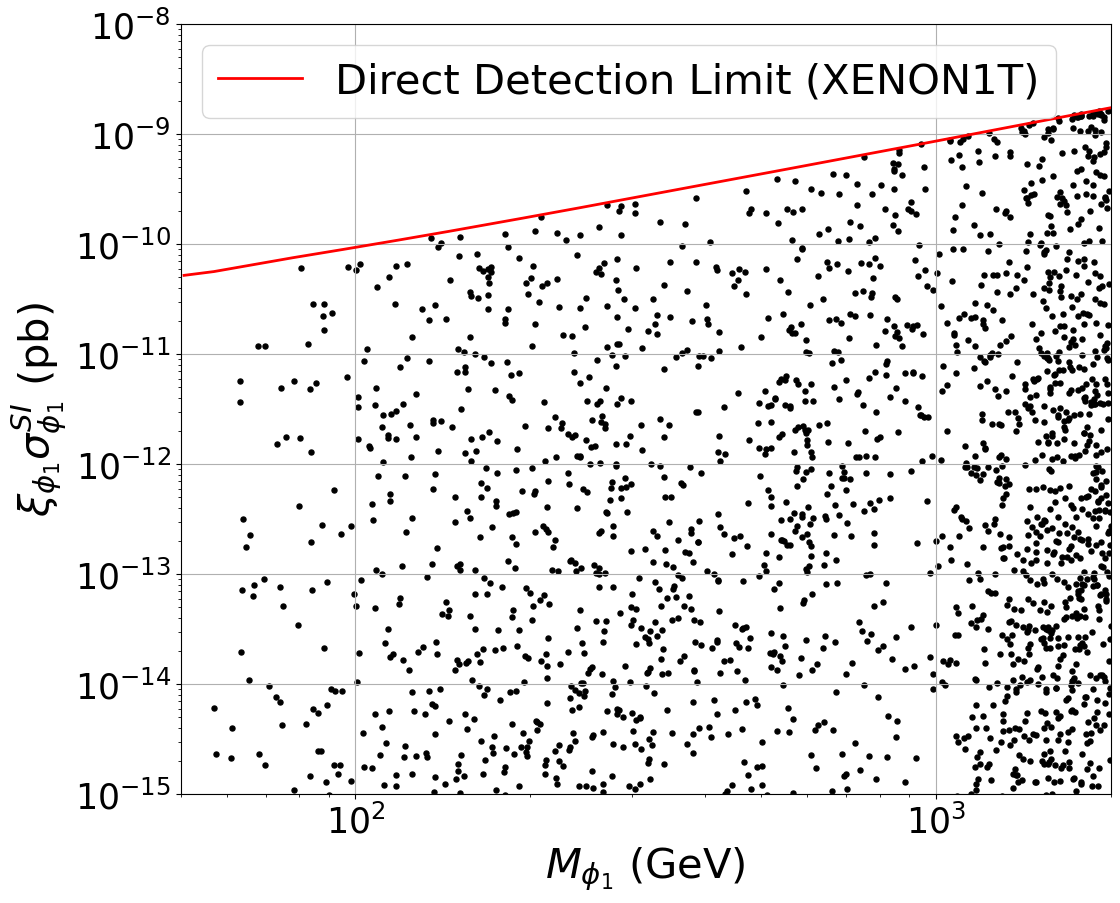

In [ ]:
#Sigma Chi 1

plt.figure(figsize=(12, 10))
plt.scatter(data_filtered[:,0],schifiltered1, color = 'black', s=13)
plt.plot(xnew, ynew, '-', color='red', linewidth=2, label='Límite de detección directa')
plt.ylabel(r"$\xi_{\phi_1} \sigma^{SI}_{\phi_1}$ (pb)", size=30)
plt.xlabel(r"$M_{\phi_1}$ (GeV)", size=30)
plt.xscale('log')
plt.yscale('log')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlim(5e1,2e3)
plt.ylim(1e-15,1e-8)
plt.legend(fontsize=30)
plt.grid(True)
plt.savefig("plots/relicdensity3.eps", bbox_inches='tight')
plt.show()

In [ ]:
#Sigma Chi 2

plt.figure(figsize=(12, 10))
plt.scatter(data_filtered[:,2],schifiltered2, color = 'black', s=13)
plt.plot(xnew, ynew, '-', color='red', linewidth=2, label='Límite de detección directa')
plt.ylabel(r"$\xi_{\phi_2} \sigma^{SI}_{\phi_2}$ (pb)", size=30)
plt.xlabel(r"$M_{\phi_2}$ (GeV)", size=30)
plt.xscale('log')
plt.yscale('log')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlim(5e1,2e3)
plt.ylim(1e-15,1e-8)
plt.legend(fontsize=30)
plt.grid(True)
plt.savefig("plots/relicdensity4.eps", bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

### El Resto de Parámetros

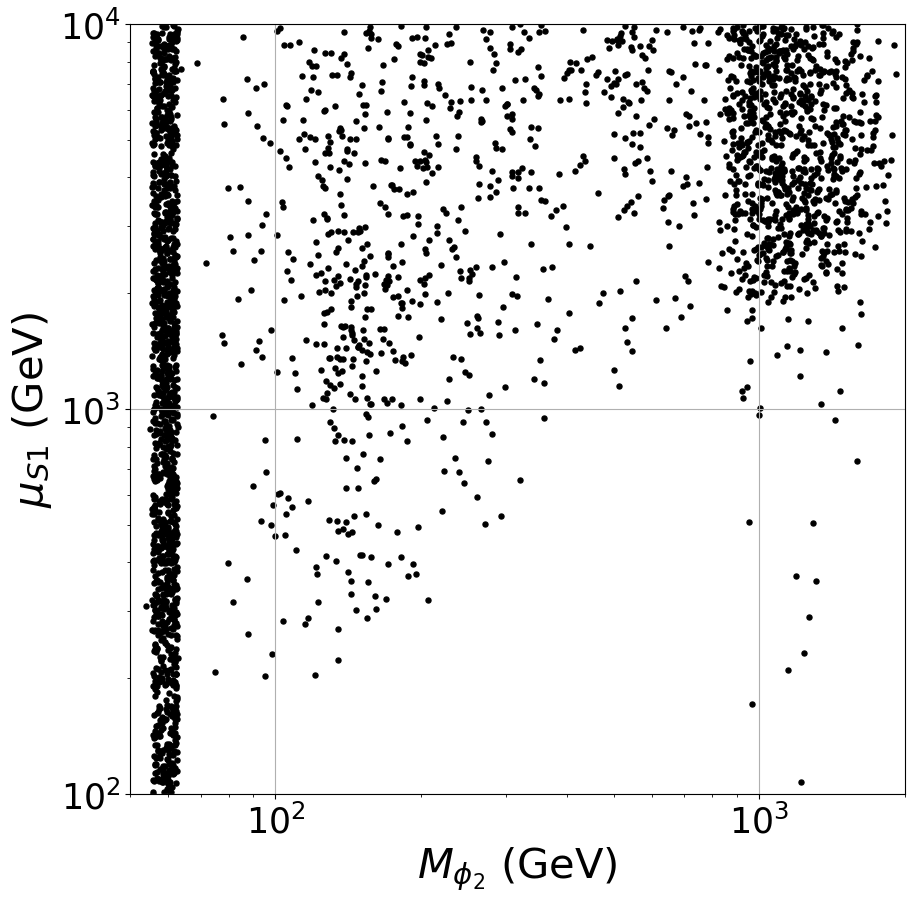

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:,2],data_filtered[:,7], color = 'black', s=13)
plt.xscale('log')
plt.yscale('log')

plt.xticks(size=25)
plt.yticks(size=25)
plt.ylabel(r"$\mu_{S1}$ (GeV)", size=30)
plt.xlabel(r"$M_{\phi_2}$ (GeV)", size=30)
plt.xlim(5e1,2e3)
plt.ylim(1e2,1e4)
plt.grid()
plt.savefig("plots/relicdensity0.eps", bbox_inches='tight')
plt.show()

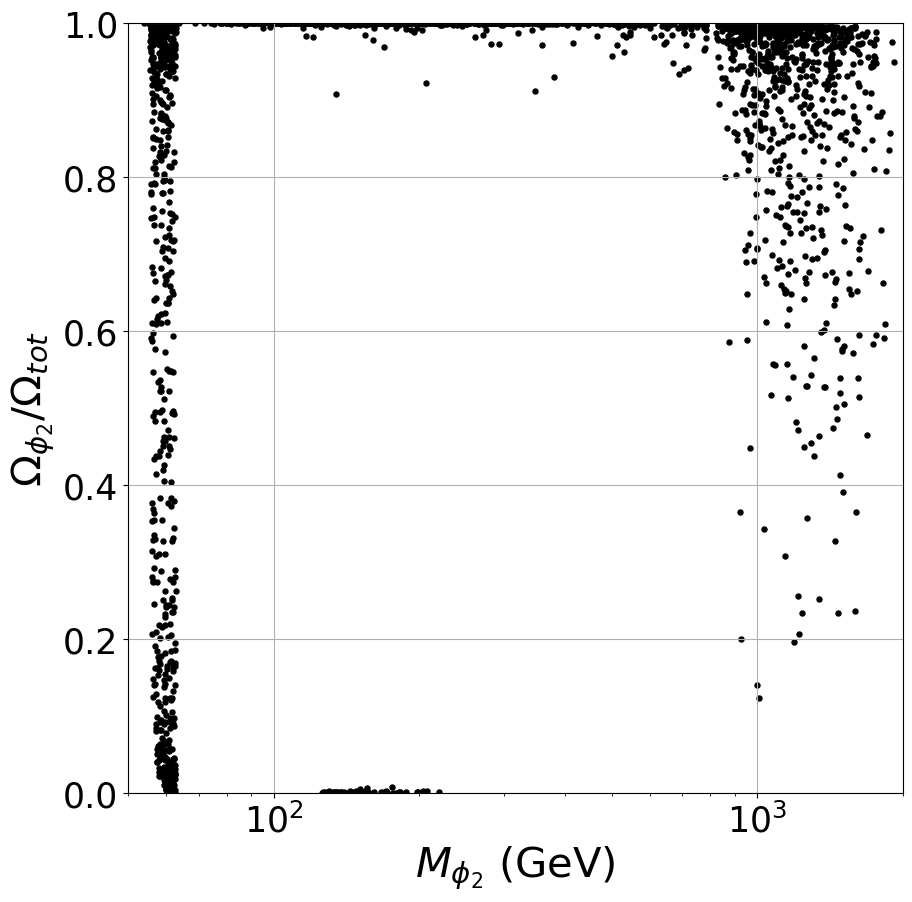

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:,2],data_filtered[:,-2]/(data_filtered[:, -2] + data_filtered[:, -3]), color = 'black', s=13)
plt.xscale('log')

plt.xticks(size=25)
plt.yticks(size=25)
plt.ylabel(r"$\Omega_{\phi_2} / \Omega_{tot}$", size=30)
plt.xlabel(r"$M_{\phi_2}$ (GeV)", size=30)
plt.xlim(5e1,2e3)
plt.ylim(0,1)
plt.grid()
plt.savefig("plots/relicdensity1.eps", bbox_inches='tight')
plt.show()

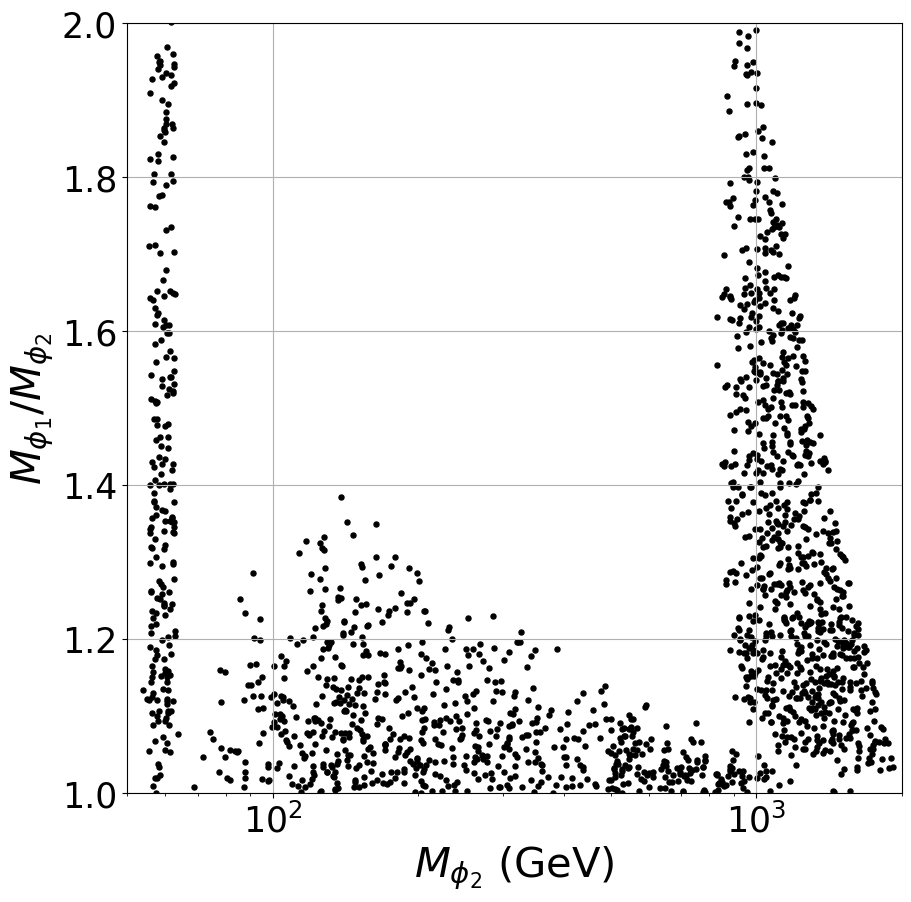

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:,2],data_filtered[:,0]/(data_filtered[:,2]), color = 'black', s=13)
plt.xscale('log')

plt.xticks(size=25)
plt.yticks(size=25)
plt.ylabel(r"$M_{\phi_1} / M_{\phi_2} $", size=30)
plt.xlabel(r"$M_{\phi_2}$ (GeV)", size=30)
plt.xlim(5e1,2e3)
plt.ylim(1,2)
plt.grid()
plt.savefig("plots/relicdensity2.eps", bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


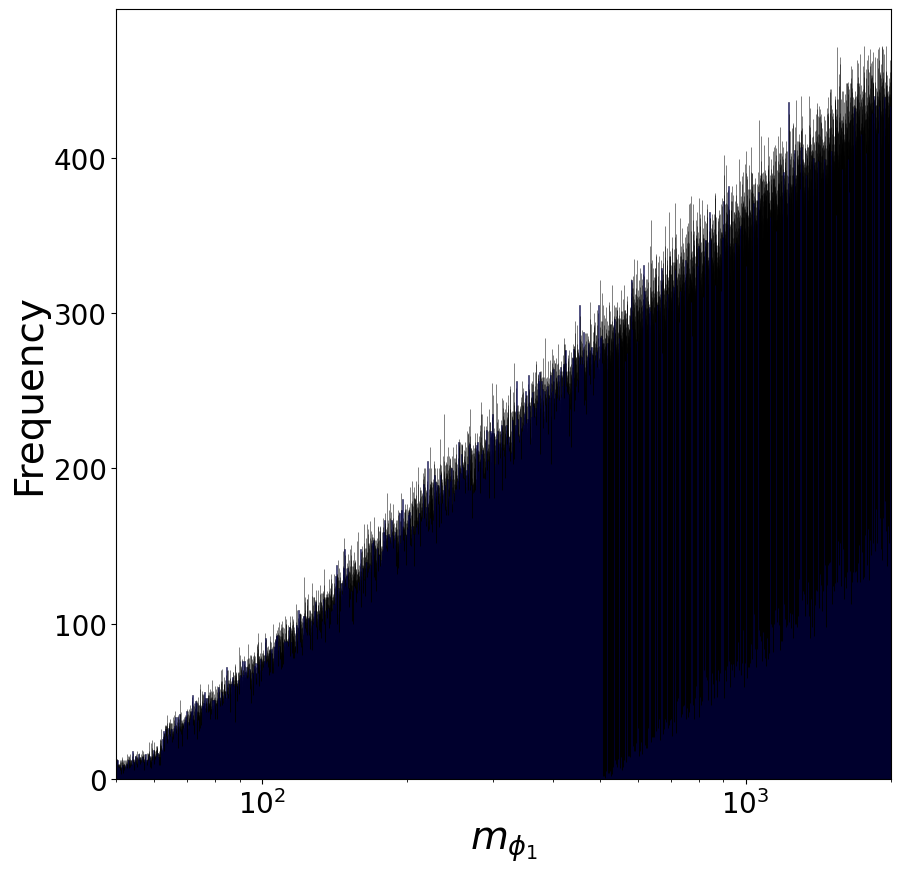

In [ ]:
plt.figure(figsize=(10, 10)) 

unique_values = np.unique(all_arrays[:, 0])

plt.hist(all_arrays[:, 0], bins=unique_values, color='blue', alpha=0.7, edgecolor='black', linewidth=0.5)  
plt.xlabel(r"$m_{\phi_1}$", size=28)  
plt.ylabel('Frequency', size=28)  
plt.grid()

plt.xlim(5e1,2e3)

plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()

plt.xscale('log')
plt.savefig("plots/histm1.eps", bbox_inches='tight')
plt.show()

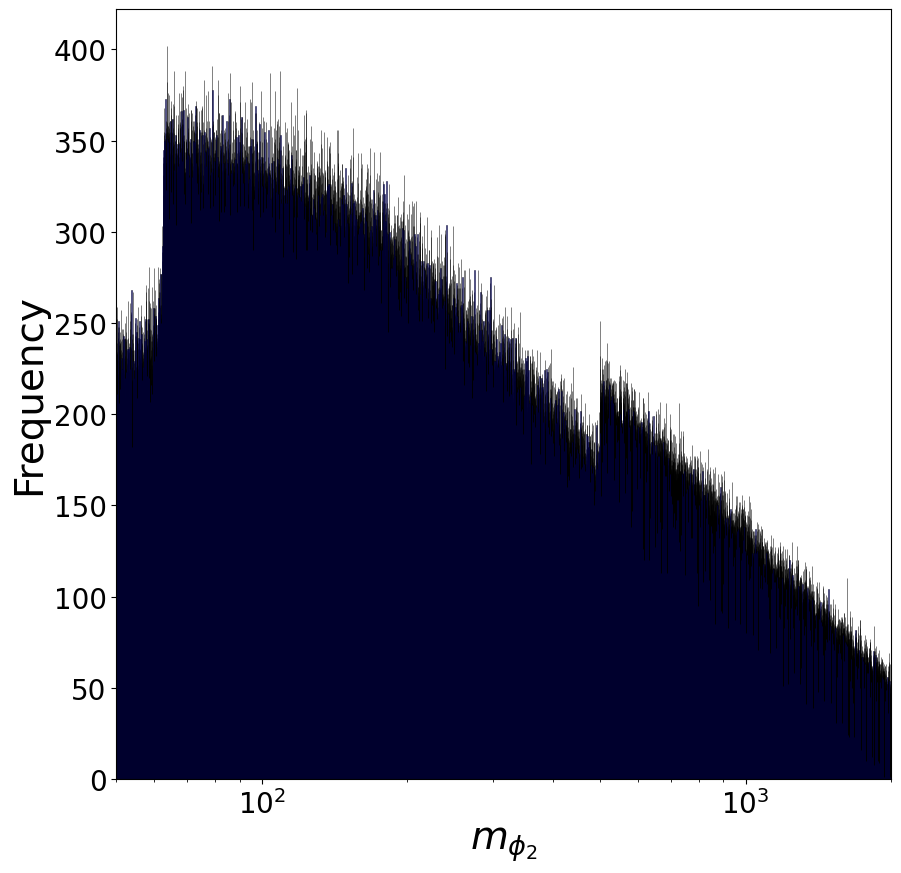

In [ ]:
plt.figure(figsize=(10, 10)) 

unique_values = np.unique(all_arrays[:, 2])

plt.hist(all_arrays[:, 2], bins=unique_values, color='blue', alpha=0.7, edgecolor='black', linewidth=0.5)  
plt.xlabel(r"$m_{\phi_2}$", size=28)  
plt.ylabel('Frequency', size=28)  
plt.grid()

plt.xlim(5e1,2e3)

plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()

plt.xscale('log')
plt.savefig("plots/histm2.png")
plt.show()

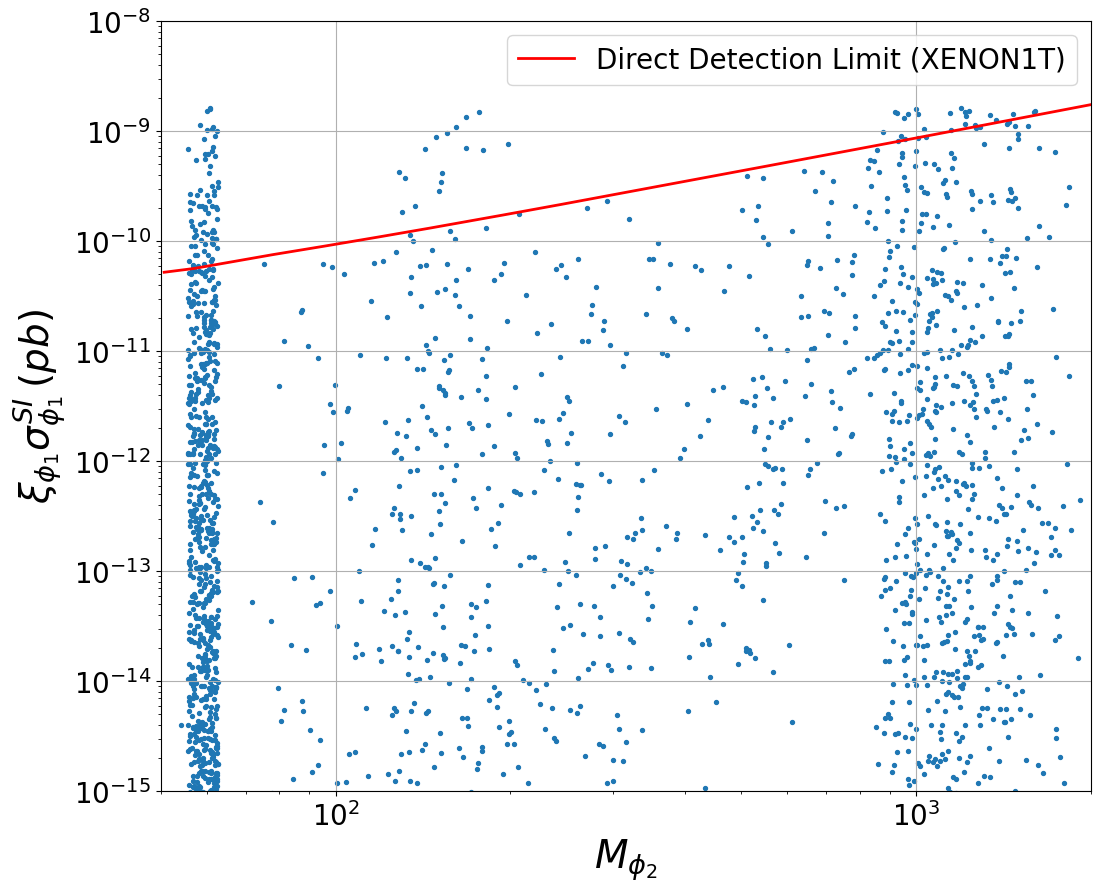

In [ ]:
#Sigma Chi 1 especial

plt.figure(figsize=(12, 10))
plt.scatter(data_filtered[:,2],schifiltered1, s=8)
plt.plot(xnew, ynew, '-', color='red', linewidth=2, label='Direct Detection Limit (XENON1T)')
plt.ylabel(r"$\xi_{\phi_1} \sigma^{SI}_{\phi_1} \, (pb)$", size=28)
plt.xlabel(r"$M_{\phi_2}$", size=28)
plt.xscale('log')
plt.yscale('log')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim(5e1,2e3)
plt.ylim(1e-15,1e-8)
plt.legend(fontsize=20)
plt.grid(True)
plt.savefig("plots/relicdensityEXTRA.png")
plt.show()